## Load libraries

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tracking
reload(tracking)

<module 'tracking' from 'tracking.pyc'>

## Set analysis parameters

In [8]:
# analysis parameters
ID = "S4D_1017"
path = "/Users/danielacker/Google Drive/Experiments/Behavior_after_S4D_infusion/Converted_video/1017_field.avi"
start_frame = 134
duration = 300
x = 425 # upper left x position (px)
y = 158 # upper left y position (px)
w = 365 # size of box floor (px)

## Run analysis

distance          36.71412
time_in_center    23.87500
center_entries    13.00000
zones_explored    16.00000
Name: S4D_1017, dtype: float64


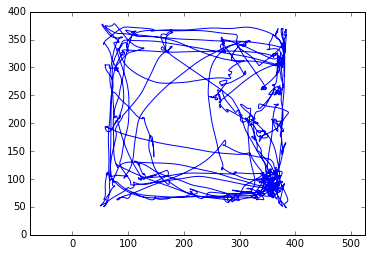

In [2]:
# perform tracking
result = tracking.track(path, start_frame, duration, x, y, w)
output_path = "../raw_tracking_data/" + str(ID) + "_xy.csv"
tracking.save_tracking_output(result, path=output_path)

# total distance travelled
distance = tracking.total_distance(result, w)

# center exploration
in_center = tracking.when_in_center(result, w)
t_in = tracking.time_in_center(in_center)
entries = tracking.center_entries(in_center)

# overall exploration
zone_count, _ = tracking.zones_explored(result, w)

# extracted info dataframe
new_row = [distance, t_in, entries, zone_count]
df = pd.read_csv("../extracted_tracking_data.csv", index_col="experiment_ID")
df.loc[ID] = new_row
df.to_csv("../extracted_tracking_data.csv")
print df.loc[ID]

# plot tracking for visual confirmation
plt.plot(result[:,1], result[:,0])
plt.axes().set_aspect('equal', 'datalim')

## Create 3D plot

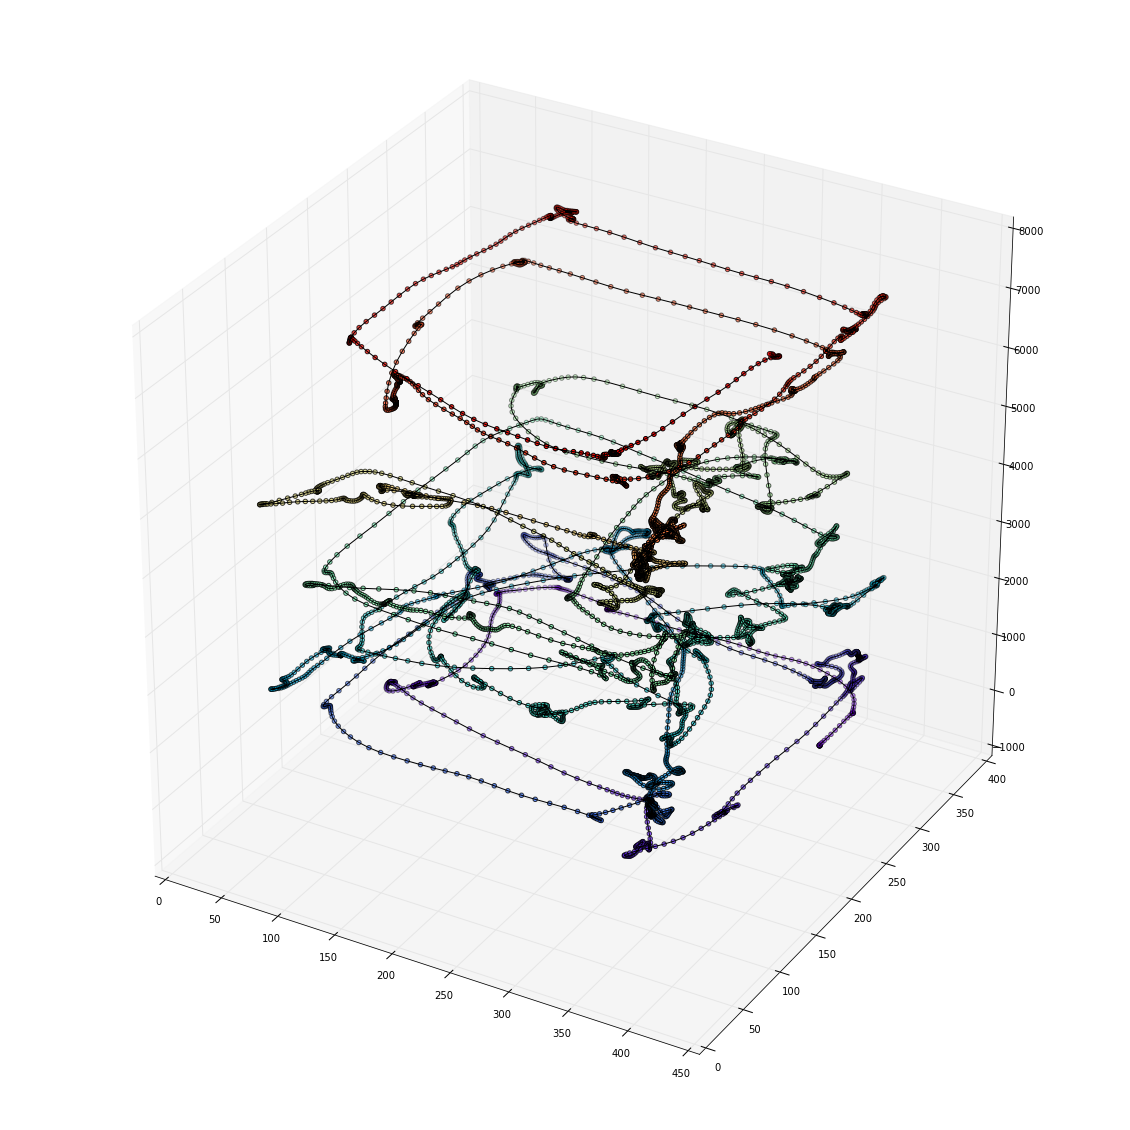

In [10]:
# 3d plot
plt.figure(figsize=(20,20))
ax = plt.subplot(111, projection='3d')
t = np.arange(len(result[:,1]))
Axes3D.plot(ax, xs=result[:,1], ys=result[:,0], zs=t, c="k")
Axes3D.scatter(ax, xs=result[:,1], ys=result[:,0], zs=t, c=t, cmap="rainbow")

## Create representative video

In [7]:
import cv2

cap = cv2.VideoCapture(path)
i = 0
f = 0
while(i < start_frame + 24*duration):
    # Take each frame
    _, frame = cap.read()

    if i >= start_frame:
        plt.imshow(frame[y - int(w*0.1) : y + int(w*1.1), x - int(w*0.1) : x + int(w*1.1)])
        plt.plot(result[:f,1], result[:f,0], c="red")
        plt.savefig("overlay_stills/" + str(i) + ".png")
        plt.clf()
        f += 1

    i += 1